In [23]:
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras.utils as np_utils
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [3]:
pip install "tensorflow<2.11

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 16.2 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bebit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
#1. Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
#2. Obtenga las categorías de la base

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#3. Descripción de la base de datos

class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

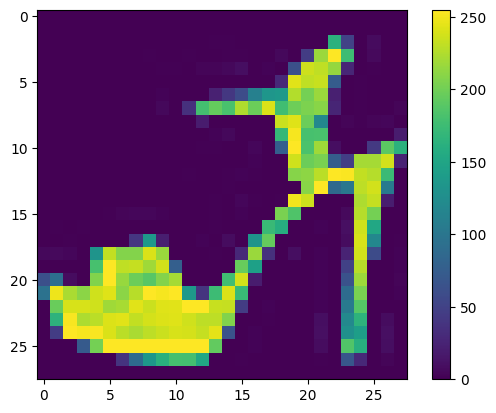

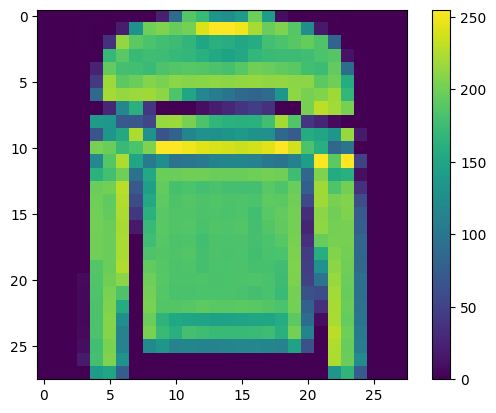

In [10]:
# 3. Visualice sus datos.

plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# 4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe
# convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.

train_X = train_X.reshape(-1, 28,28, 1).astype('float32')/255.0
test_X = test_X.reshape(-1, 28,28, 1).astype('float32')/255.0

In [16]:
# 5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.

num_categories = 10  # Número de categorías/clases en el conjunto de datos

# Convertir las etiquetas de entrenamiento a codificación one-hot
train_y = np_utils.to_categorical(train_Y, num_categories)

# Convertir las etiquetas de prueba a codificación one-hot
test_y = np_utils.to_categorical(test_Y, num_categories)

In [25]:
# 6. Separar datos de entrenamiento y testeo

data_X = train_X
data_y = train_y 

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de los datos de entrenamiento:", train_X.shape, train_y.shape)
print("Dimensiones de los datos de prueba:", test_X.shape, test_y.shape)


Dimensiones de los datos de entrenamiento: (48000, 28, 28) (48000, 10)
Dimensiones de los datos de prueba: (12000, 28, 28) (12000, 10)


In [30]:
#7. Para modelar sus datos, utilice los siguientes paquetes:
# import keras
# from keras.models import Sequential,Input,Model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [29]:
#8. Agregue la capa de agrupación máxima con MaxPooling2D() y así sucesivamente.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Capa convolucional
model.add(MaxPooling2D(pool_size=(2, 2)))  # Capa de agrupación máxima

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [34]:
#9. Compilación y visualización del modelo

# Crear un modelo secuencial
model = Sequential()

# Agregar capas al modelo
model.add(Dense(64, activation='relu', input_shape=train_X.shape[1:]))
model.add(Dense(num_classes, activation='softmax'))

# Construir el modelo
model.build(input_shape=(None, *train_X.shape[1:]))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Visualizar el modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 64)            1856      
                                                                 
 dense_1 (Dense)             (None, 28, 10)            650       
                                                                 
Total params: 2,506
Trainable params: 2,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# - Qué es Keras
# Es una biblioteca de Python para construir y entrenar redes neuronales de forma sencilla y modular. 
# Proporciona una interfaz intuitiva, predefinición de capas y modelos, y es compatible con diferentes 
# motores de cálculo. Es ampliamente utilizada en el desarrollo de modelos de aprendizaje profundo.

# - Redes neuronales convolucionales (CNN)
# Son un tipo de modelo de aprendizaje profundo especialmente diseñado para procesar datos con estructura 
# de cuadrícula, como imágenes. Utilizan capas de convolución para extraer características relevantes y 
# capas de pooling para reducir la dimensionalidad. Su capacidad para aprender patrones visuales las hace 
# efectivas en tareas de visión por computadora y reconocimiento de imágenes.

# - Capas
# En una red neuronal son componentes que procesan y transforman los datos. Pueden incluir capas de entrada, 
# capas ocultas y capas de salida. Cada capa realiza operaciones específicas, como multiplicaciones de pesos, 
# funciones de activación y cálculos de pérdida. Estas capas se organizan en una secuencia para formar la 
# arquitectura de la red y permiten el aprendizaje y la inferencia de datos.